<a href="https://colab.research.google.com/github/Rajashekar-Anumalla/Potato_Disease_Classification_CNN/blob/main/Potato_Dieases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Img_Size = 256
Batch_Size = 32
Channels = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/DeepLearningProjects/Potato_Dieases',
    shuffle=True,image_size=(Img_Size,Img_Size),batch_size=Batch_Size)

Found 2155 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len_dataset= len(dataset)

In [ ]:
for img_batch, label_batch in dataset.take(1):
  print(img_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 0 0 2 0 1 1 0 0 2 0 1 0 0 1 0 1 1 0 0 0 1 0 2 0 1 1 0]


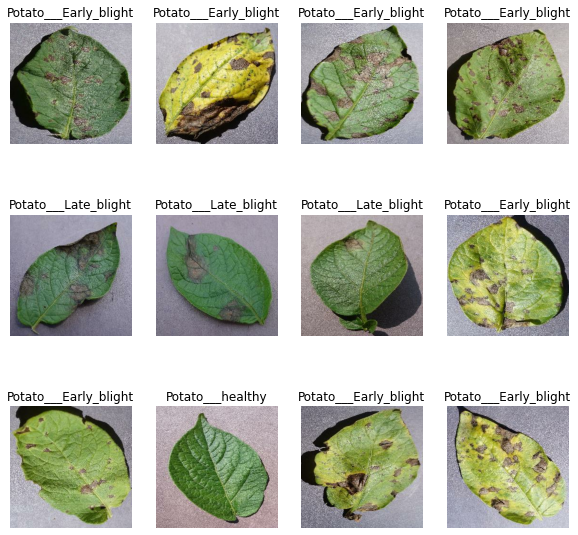

In [ ]:
plt.figure(figsize=(10,10))
for img_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(img_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')


In [ ]:
len(dataset)

68

In [ ]:
# lets split dataset into train, validation and test in 70:15:15

train_ds = dataset.take(int(len(dataset)*0.7))

In [ ]:
len(train_ds)

47

In [ ]:
valid_ds = dataset.skip(len(train_ds)).take(int((len(dataset)-len(train_ds))*.5))

In [ ]:
len(valid_ds)

10

In [ ]:
test_ds = dataset.skip(len(train_ds)+len(valid_ds))

In [ ]:
len(test_ds)

11

In [ ]:
def get_dataset_partitions_tf(ds, train_sz=0.8, valid_sz=0.1, test_sz=0.1,
                           shuffle=True, shuffle_size=1000 ):
  ds_sz = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=10)
  train_ds = ds.take(int(len(ds)*train_sz))
  tr_len = len(train_ds)
  val_ds = ds.skip(tr_len).take(int((ds_sz-tr_len)*.5))
  val_len = len(val_ds)
  test_ds = ds.skip(tr_len+val_len)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

7

In [ ]:
len(test_ds)

7

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
                  layers.experimental.preprocessing.Resizing(Img_Size,Img_Size),
                  layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
data_agumentation = tf.keras.Sequential([
                  layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                  layers.experimental.preprocessing.RandomRotation(0.2)
])